# Бинарная классификация

## Данные

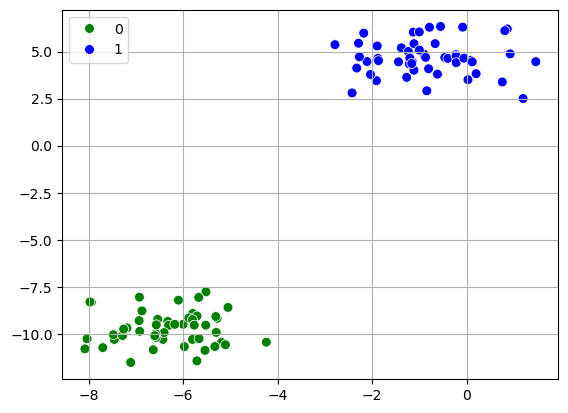

In [104]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=150, n_features=2, random_state=11)
X = X[y!=2]
y = y[y!=2]

plt.grid()
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette=['green', 'blue'], s=50);

## Обучение

In [105]:
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('SVM', LinearSVC())
])

svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()), ('SVM', LinearSVC())])

## Визуализация

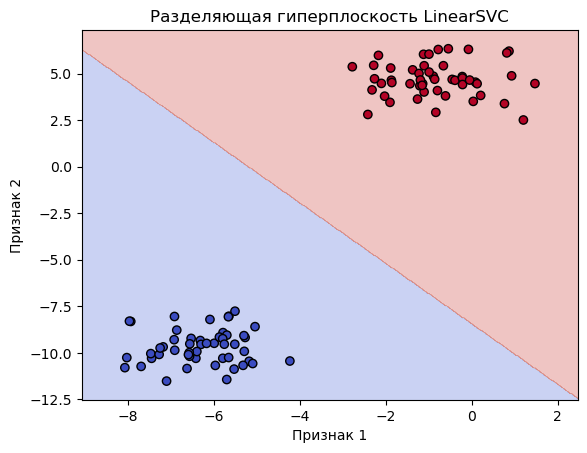

In [109]:
import numpy as np
import matplotlib.pyplot as plt

# Определим границы области
x0_min, x0_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x1_min, x1_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# Сетка координат
xx, yy = np.meshgrid(np.linspace(x0_min, x0_max, 500),
                     np.linspace(x1_min, x1_max, 500))

# Получим все координаты точек сетки
X_grid = np.c_[xx.ravel(), yy.ravel()]

# Получим предсказания модели на этой сетке
Z = svm_clf.predict(X_grid).reshape(xx.shape)

# Нарисуем всё
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')

# Параметры
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.title('Разделяющая гиперплоскость LinearSVC')
plt.show()


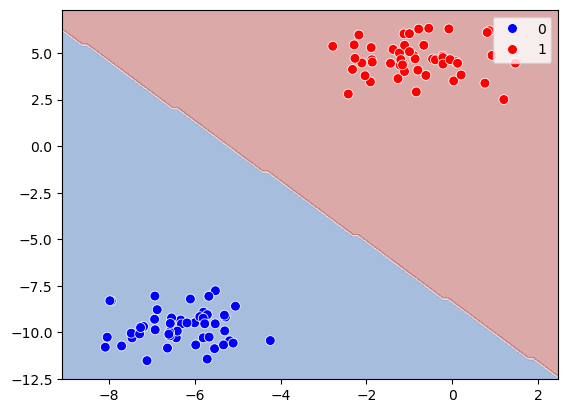

In [131]:
from sklearn.inspection import DecisionBoundaryDisplay

dbd = DecisionBoundaryDisplay.from_estimator(svm_clf, X, response_method='predict', cmap='vlag', alpha=0.5)
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette=['blue', 'red'], s=50);

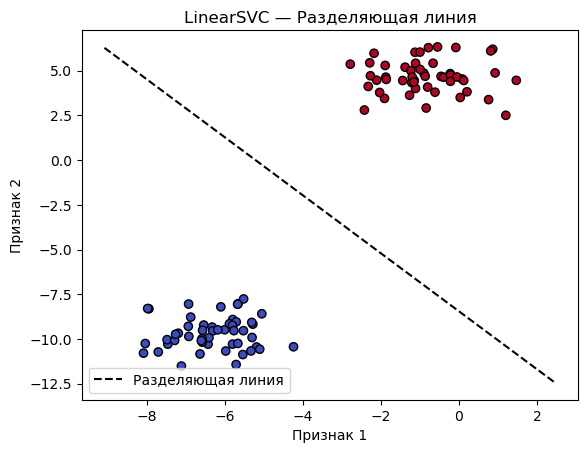

In [112]:
import numpy as np
import matplotlib.pyplot as plt

# Возьмём границы по оси X
x0 = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 200)

# Достаём коэффициенты из модели
w = svm_clf.named_steps['SVM'].coef_[0]
b = svm_clf.named_steps['SVM'].intercept_[0]

# Обратное преобразование масштаба (если нужно)
scaler = svm_clf.named_steps['scaler']
x0_scaled = scaler.transform(np.c_[x0, np.zeros_like(x0)])[:, 0]
x1_scaled = -(w[0] * x0_scaled + b) / w[1]

# Возвращаем обратно масштабированный x1
x1 = scaler.inverse_transform(np.c_[x0_scaled, x1_scaled])[:, 1]

# Отрисовка
plt.plot(x0, x1, 'k--', label='Разделяющая линия')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.legend()
plt.title('LinearSVC — Разделяющая линия')
plt.show()
